# **PyTorch Refersher**
---

The following notebook is a quick reference to refresh the basic features in PyTorch, and how to build basic to more complex neural networks.

In [80]:
# %pip install torch torchvision

In [81]:
import torch
import numpy as np

In [82]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## Tensor Operations
---

In [83]:
tensor = torch.tensor([1,2,3], dtype=torch.float32)
print(tensor)

tensor([1., 2., 3.])


In [84]:
tensor = torch.tensor([[1,0],[0,1]])
print(tensor)

tensor([[1, 0],
        [0, 1]])


In [85]:
np_array = np.array([1,2,3])
print(np_array)
np_array = np.array([1,2,3], dtype=np.float32)
print(np_array)
np_array = np.array([[1,2,3],[4,5,6]])
print(np_array)


[1 2 3]
[1. 2. 3.]
[[1 2 3]
 [4 5 6]]


In [86]:
tensor= torch.from_numpy(np_array)
print(tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [87]:
torch.randint(1,3,[1,2])

tensor([[1, 2]])

- ones, zeroes, rand, randn, randint are tensor generation operations.
- randn generates from a Z-distribution.
- randint requires a high, low, then an array shape in a list form.
- rand generates from a uniform distribution.

In [88]:
a = torch.ones(1,3, dtype=torch.float32)
b = torch.tensor([1,2,3], dtype=torch.float32)

In [89]:
print(a+b)
print(a*b)
print(a/b)
print(a%b)
print(a**b)
print(a.add(b))
print(a.mul(b))
print(a.div(b))

tensor([[2., 3., 4.]])
tensor([[1., 2., 3.]])
tensor([[1.0000, 0.5000, 0.3333]])
tensor([[0., 1., 1.]])
tensor([[1., 1., 1.]])
tensor([[2., 3., 4.]])
tensor([[1., 2., 3.]])
tensor([[1.0000, 0.5000, 0.3333]])


In [90]:
# print(torch.matmul(a,b))
# print(torch.mm(a,b.transpose(0,1)))


- operator between two operands seem to behave as element-wise operations for each tensor position.
- $a*b$ is equivalent to $a.mul(b)$

## Autograd
---

In [91]:
x = torch.tensor([4.0], requires_grad=True)

y=x**2
z=y*2 + 5
z.backward()
print(x.grad)

tensor([16.])


## Neural Network Implementation
---

In [92]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(4,3)
        self.layer2 = nn.Linear(3,5)
        self.layer3 = nn.Linear(5,1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [93]:
model_1 = NeuralNetwork()
print(model_1)

NeuralNetwork(
  (layer1): Linear(in_features=4, out_features=3, bias=True)
  (layer2): Linear(in_features=3, out_features=5, bias=True)
  (layer3): Linear(in_features=5, out_features=1, bias=True)
)


In [94]:
x = torch.randn(2,4)
print(x)
print(model_1(x))

tensor([[ 0.6625, -1.0580,  1.7980, -0.4506],
        [ 1.3225, -0.7274, -1.3352,  1.1088]])
tensor([[0.1700],
        [0.1488]], grad_fn=<AddmmBackward0>)


## Training Loop

---
The below implemenation is a feed-forward neural network for regression.

In [ ]:
# %pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [96]:
from sklearn.model_selection import train_test_split

x = torch.randn(500,4)
y = torch.randn(500,1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

torch.Size([400, 4]) torch.Size([100, 4]) torch.Size([400, 1]) torch.Size([100, 1])


In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr= 0.001)

for epoch in range(10000):
    y_pred = model_1(x_train)
    loss = criterion(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")




Epoch 0, Loss: 1.0579819679260254
Epoch 10, Loss: 1.0564321279525757
Epoch 20, Loss: 1.0550246238708496
Epoch 30, Loss: 1.0537461042404175
Epoch 40, Loss: 1.0525844097137451
Epoch 50, Loss: 1.051527976989746
Epoch 60, Loss: 1.0505675077438354
Epoch 70, Loss: 1.049692988395691
Epoch 80, Loss: 1.0488959550857544
Epoch 90, Loss: 1.0481703281402588
Epoch 100, Loss: 1.0475094318389893
Epoch 110, Loss: 1.0469071865081787
Epoch 120, Loss: 1.0463576316833496
Epoch 130, Loss: 1.0458555221557617
Epoch 140, Loss: 1.045397400856018
Epoch 150, Loss: 1.044979453086853
Epoch 160, Loss: 1.0445976257324219
Epoch 170, Loss: 1.0442471504211426
Epoch 180, Loss: 1.0439271926879883
Epoch 190, Loss: 1.0436345338821411
Epoch 200, Loss: 1.0433671474456787
Epoch 210, Loss: 1.0431222915649414
Epoch 220, Loss: 1.0428977012634277
Epoch 230, Loss: 1.0426912307739258
Epoch 240, Loss: 1.0425018072128296
Epoch 250, Loss: 1.0423282384872437
Epoch 260, Loss: 1.0421686172485352
Epoch 270, Loss: 1.0420221090316772
Epoch 2

## Dataset and Dataloader
---

In [98]:
import torch
import torch.nn.functional as F
import torch.optim as optimizer
from torch.utils.data import Dataset, DataLoader
import numpy

In [99]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [100]:
X = torch.rand(1000,5)
y = torch.rand(1000,1)

dataset = CustomDataset(X, y)

In [101]:
for it in iter(dataset):
    print(it)

(tensor([0.6825, 0.6022, 0.2837, 0.1354, 0.4640]), tensor([0.1857]))
(tensor([0.8622, 0.5197, 0.6723, 0.7781, 0.3921]), tensor([0.9195]))
(tensor([0.2865, 0.5460, 0.5824, 0.4105, 0.4478]), tensor([0.4211]))
(tensor([0.6689, 0.5519, 0.8791, 0.5304, 0.7363]), tensor([0.3749]))
(tensor([0.6742, 0.0452, 0.9563, 0.5942, 0.8678]), tensor([0.9954]))
(tensor([0.8136, 0.6932, 0.4184, 0.9481, 0.3983]), tensor([0.5223]))
(tensor([0.9126, 0.0187, 0.1875, 0.7272, 0.6944]), tensor([0.0838]))
(tensor([0.8207, 0.1065, 0.9366, 0.9799, 0.8265]), tensor([0.7442]))
(tensor([0.4288, 0.7334, 0.1062, 0.7947, 0.4625]), tensor([0.0332]))
(tensor([0.7608, 0.1677, 0.7328, 0.7553, 0.8051]), tensor([0.4079]))
(tensor([0.6095, 0.4659, 0.1700, 0.8220, 0.3784]), tensor([0.2264]))
(tensor([0.5162, 0.6648, 0.4910, 0.8610, 0.1263]), tensor([0.4778]))
(tensor([0.5034, 0.6167, 0.4325, 0.6758, 0.2345]), tensor([0.5097]))
(tensor([0.9921, 0.9873, 0.7759, 0.7462, 0.4135]), tensor([0.7942]))
(tensor([0.0438, 0.2962, 0.8798, 0

### Load MNIST Dataset from torchvision

In [102]:
from torchvision import datasets, transforms

In [103]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

mnist_dataset = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

In [104]:
print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )


In [105]:
BATCH_SIZE = 32
train_loader = DataLoader(
    dataset=mnist_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
    drop_last=False
)

In [106]:
for batch_id, (X, y) in enumerate(train_loader):
    print(f"Batch: {batch_id}")
    print(f"Input size: {X.shape}")
    print(f"Target: {y.shape}")

Batch: 0
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 1
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 2
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 3
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 4
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 5
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 6
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 7
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 8
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 9
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 10
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 11
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 12
Input size: torch.Size([32, 1, 28, 28])
Target: torch.Size([32])
Batch: 13
Input size: torch.Size([3

In [107]:
from torch.utils.data import random_split

total_size = len(mnist_dataset)
train_size = int(0.8 * total_size)
test_size = total_size - train_size

print(f"Total Size: {total_size}, Train Size: {train_size}, Test Size: {test_size}")

Total Size: 60000, Train Size: 48000, Test Size: 12000


In [108]:
train_dataset, test_dataset = random_split(mnist_dataset, [train_size, test_size])

train_loader = DataLoader(
    train_dataset, 
    batch_size=BATCH_SIZE,
    shuffle=True
    )

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False
)

## Training, Evaluation, Plotting Functions
---

In [119]:
NUM_EPOCHS = 30

def train_model(model, optimizer, criterion, train_loader, test_loader, num_epochs=30, device='cpu'):
    
    # Move model to device
    model = model.to(device)
    
    # For tracking metrics
    train_losses = []
    test_losses = []
    test_accuracies = []

    for epoch in range(NUM_EPOCHS):

        #Training Phase
        model.train()
        # print(f"Epoch {epoch} in progress...")
        running_loss = 0

        for batch_idx, (X, y) in enumerate(train_loader):
            
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()
            output = model.forward(X)
            loss = criterion(output, y)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        
        if batch_idx % 100 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}')

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        #Evaluation Phase
        model.eval()

        test_loss = 0
        correct = 0
        with torch.no_grad():

            for (X,y) in test_loader:
                X, y = X.to(device), y.to(device)
                output = model.forward(X)
                test_loss += criterion(output, y).item()

                # Get the index of the max log-probability
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(y.view_as(pred)).sum().item()
                

        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        
        accuracy = 100. * correct / len(test_loader.dataset)
        test_accuracies.append(accuracy)
        
        print(f'Epoch: {epoch+1}/{num_epochs}')
        print(f'Train Loss: {avg_train_loss:.4f}')
        print(f'Test Loss: {test_loss:.4f}')
        print(f'Test Accuracy: {accuracy:.2f}%\n')
    
    return train_losses, test_losses, test_accuracies


In [110]:
def evaluate_model(model, test_loader, device):
    model.eval()
    all_pred = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model.forward(data)
            pred = output.argmax(dim=1)

            all_pred.extend(pred.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            
    return all_pred, all_targets

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [112]:
def plot_eval_res(predictions, targets):
    
    cm = confusion_matrix(targets, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification report
    print(classification_report(targets, predictions))    


In [117]:
def plot_train_metrics(train_losses, test_losses, test_accuracies):
    # Plot training and validation loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(test_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curves')

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(test_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.title('Accuracy Curve')

    plt.tight_layout()
    plt.show()

## Model Building
---
This NN is to test a basic CNN on the MNIST dataset using the above defined trainer and helper funtions.

In [113]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [114]:
class NN_Custom(nn.Module):
    def __init__(self):
        super(NN_Custom, self).__init__()
        self.layer1 = nn.Conv2d(1, 16, (3, 3))  # 1 input channel, 16 output channels
        self.pool = nn.AdaptiveMaxPool2d((1,1))
        self.flatten = nn.Flatten()

        x = torch.randn(1,1,28,28)
        x = self.pool(self.layer1(x))
        x = self.flatten(x)
        print(x.shape[1])
        self.layer2 = nn.Linear(x.shape[1], 10)
        # self.layer2 = nn.Linear(16 * 26 * 26, 10)  # Adjusted for output size after conv layer

    def forward(self, x):
        x = self.layer1(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.layer2(x)
        return x


In [118]:

model_2 = NN_Custom()
# model_2.forward(torch.randn(1, 1, 28, 28))

optimizer_2 = optim.SGD(model_2.parameters(), lr=0.001)
criterion_2 = nn.CrossEntropyLoss()

train_losses, test_losses, test_accuracies = train_model(
    model_2, 
    optimizer_2, 
    criterion_2, 
    train_loader, 
    test_loader, 
    num_epochs=NUM_EPOCHS,
    device=device
)

16
Epoch 0 in progress...
Epoch: 1/30
Train Loss: 2.3106
Test Loss: 2.2842
Test Accuracy: 14.02%

Epoch 1 in progress...
Epoch: 2/30
Train Loss: 2.2718
Test Loss: 2.2589
Test Accuracy: 19.31%

Epoch 2 in progress...
Epoch: 3/30
Train Loss: 2.2477
Test Loss: 2.2343
Test Accuracy: 23.52%

Epoch 3 in progress...
Epoch: 4/30
Train Loss: 2.2231
Test Loss: 2.2086
Test Accuracy: 25.53%

Epoch 4 in progress...
Epoch: 5/30
Train Loss: 2.1967
Test Loss: 2.1804
Test Accuracy: 27.88%

Epoch 5 in progress...
Epoch: 6/30
Train Loss: 2.1680
Test Loss: 2.1505
Test Accuracy: 25.91%

Epoch 6 in progress...
Epoch: 7/30
Train Loss: 2.1372
Test Loss: 2.1189
Test Accuracy: 28.97%

Epoch 7 in progress...
Epoch: 8/30
Train Loss: 2.1054
Test Loss: 2.0862
Test Accuracy: 30.74%

Epoch 8 in progress...
Epoch: 9/30
Train Loss: 2.0734
Test Loss: 2.0559
Test Accuracy: 31.04%

Epoch 9 in progress...
Epoch: 10/30
Train Loss: 2.0423
Test Loss: 2.0246
Test Accuracy: 32.35%

Epoch 10 in progress...
Epoch: 11/30
Train Los

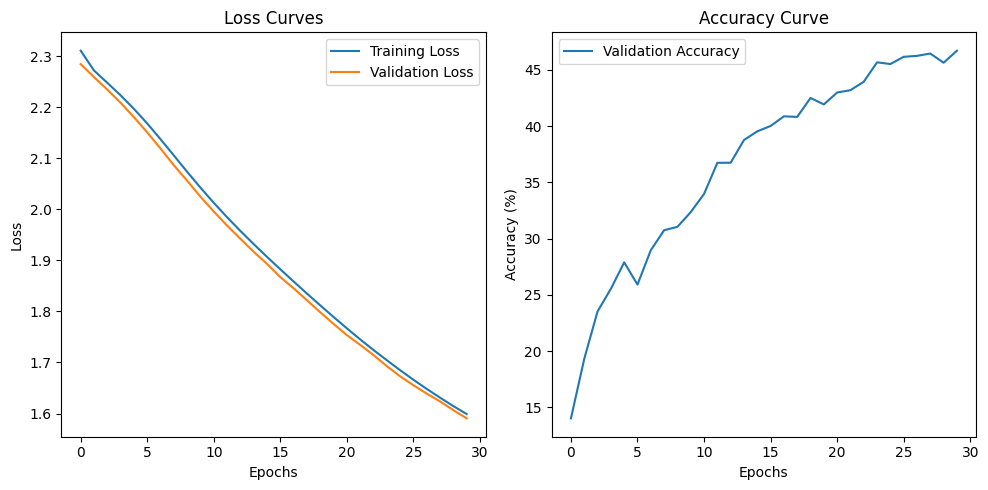

In [120]:
plot_train_metrics(train_losses, test_losses, test_accuracies)

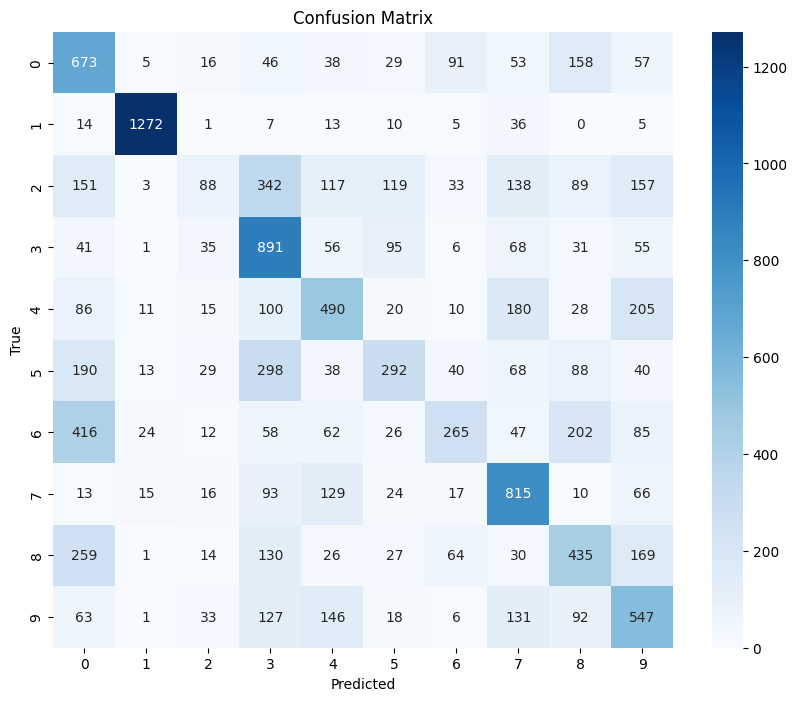

              precision    recall  f1-score   support

           0       0.35      0.58      0.44      1166
           1       0.95      0.93      0.94      1363
           2       0.34      0.07      0.12      1237
           3       0.43      0.70      0.53      1279
           4       0.44      0.43      0.43      1145
           5       0.44      0.27      0.33      1096
           6       0.49      0.22      0.31      1197
           7       0.52      0.68      0.59      1198
           8       0.38      0.38      0.38      1155
           9       0.39      0.47      0.43      1164

    accuracy                           0.48     12000
   macro avg       0.47      0.47      0.45     12000
weighted avg       0.48      0.48      0.46     12000



In [116]:
pred, target = evaluate_model(model_2, test_loader, device)

plot_eval_res(pred, target)

## Deeper CNN
---
Compare performance with baseline CNN model defined above (namely $model_2$)

In [122]:
class DeepCNN_1(nn.Module):
    def __init__(self):
        super(DeepCNN_1, self).__init__()

        #Convolutional Block 1
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        #Convolutional Block 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2)

        #Fully Concnected Layers
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # First block
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        # Second block
        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.pool2(x)
        
        # Flatten and fully connected layers
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

In [123]:
model_3 = DeepCNN_1()

In [126]:
optimizer_3 = optim.Adam(model_3.parameters(), lr = 0.001)
scheduler_3 = optim.lr_scheduler.ReduceLROnPlateau(optimizer_3, 'min', patience=3, factor=0.5)
criterion_3 = nn.CrossEntropyLoss()

Epoch: 1/30
Train Loss: 0.2290
Test Loss: 0.0912
Test Accuracy: 97.22%

Epoch: 2/30
Train Loss: 0.1077
Test Loss: 0.0488
Test Accuracy: 98.51%

Epoch: 3/30
Train Loss: 0.0891
Test Loss: 0.0404
Test Accuracy: 98.84%

Epoch: 4/30
Train Loss: 0.0732
Test Loss: 0.0400
Test Accuracy: 98.80%

Epoch: 5/30
Train Loss: 0.0650
Test Loss: 0.0384
Test Accuracy: 98.97%

Epoch: 6/30
Train Loss: 0.0542
Test Loss: 0.0381
Test Accuracy: 98.91%

Epoch: 7/30
Train Loss: 0.0474
Test Loss: 0.0398
Test Accuracy: 98.99%

Epoch: 8/30
Train Loss: 0.0412
Test Loss: 0.0397
Test Accuracy: 98.92%

Epoch: 9/30
Train Loss: 0.0383
Test Loss: 0.0355
Test Accuracy: 99.13%

Epoch: 10/30
Train Loss: 0.0352
Test Loss: 0.0420
Test Accuracy: 98.88%

Epoch: 11/30
Train Loss: 0.0306
Test Loss: 0.0372
Test Accuracy: 99.07%

Epoch: 12/30
Train Loss: 0.0286
Test Loss: 0.0385
Test Accuracy: 99.02%

Epoch: 13/30
Train Loss: 0.0244
Test Loss: 0.0377
Test Accuracy: 99.09%

Epoch: 14/30
Train Loss: 0.0249
Test Loss: 0.0368
Test Accur

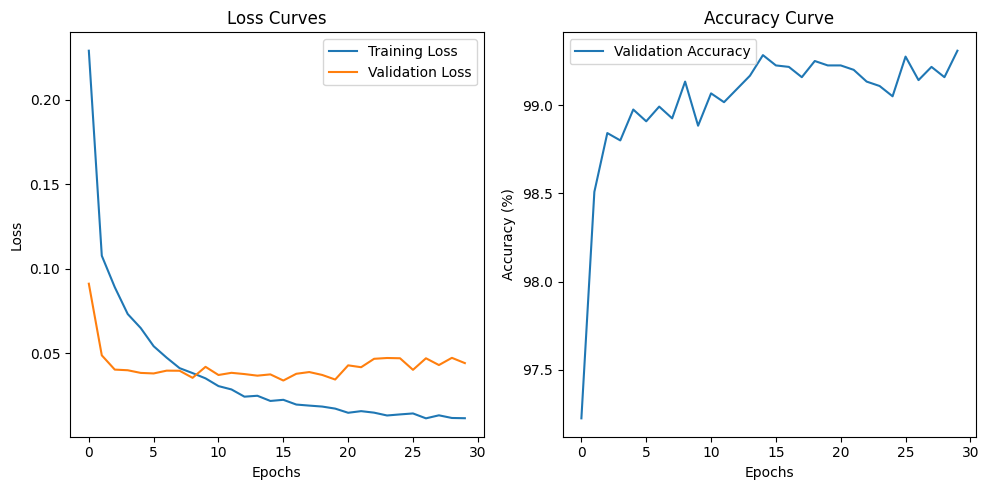

In [127]:
train_losses_3, test_losses_3, test_accuracies_3 = train_model(
    model_3, 
    optimizer_3, 
    criterion_3, 
    train_loader, 
    test_loader, 
    num_epochs=NUM_EPOCHS,
    device=device
)

plot_train_metrics(train_losses_3, test_losses_3, test_accuracies_3)

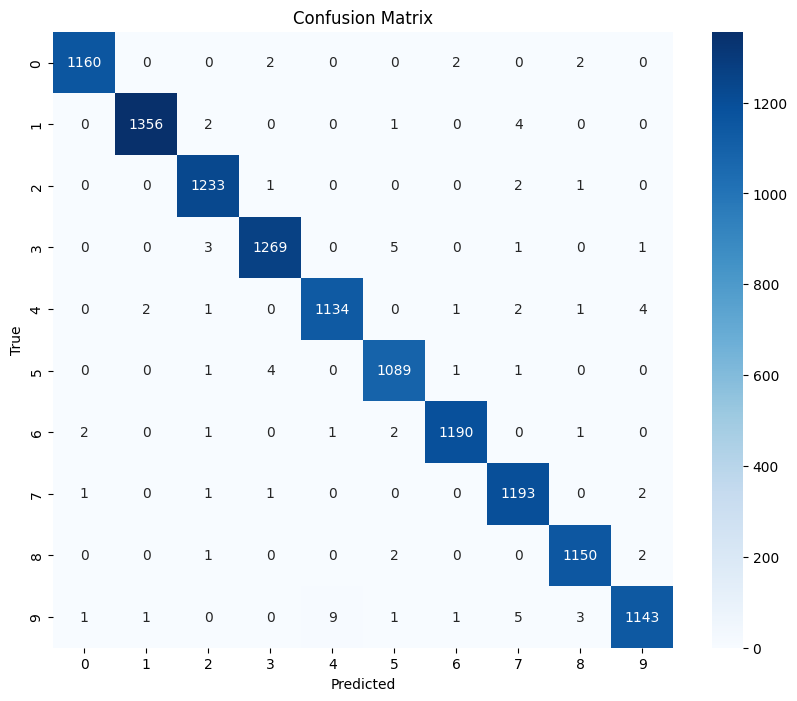

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1166
           1       1.00      0.99      1.00      1363
           2       0.99      1.00      0.99      1237
           3       0.99      0.99      0.99      1279
           4       0.99      0.99      0.99      1145
           5       0.99      0.99      0.99      1096
           6       1.00      0.99      0.99      1197
           7       0.99      1.00      0.99      1198
           8       0.99      1.00      0.99      1155
           9       0.99      0.98      0.99      1164

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000



In [128]:
pred_3, target_3 = evaluate_model(model_3, test_loader, device)

plot_eval_res(pred_3, target_3)

## CIFAR10 Dataset
---
Useful for more complex NN architecture testing purposes.

In [130]:
import ssl
import urllib.request

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

In [131]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define transformations
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
])

# Load datasets
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)

# Create data loaders
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=128, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=False, num_workers=2)

# Class names for reference
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


This covers the fundamental concepts of PyTorch. 

Some next topics:
- Dataset and DataLoader
- More complex neural network architectures
- Transfer learning
- Custom loss functions
- Model saving and loading
- Batch processing
- Regularization techniques
